In [1]:
import pandas as pd 

In [2]:
load_boston = pd.read_csv('HousingData.csv')

In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = load_boston


In [5]:
dataset = df

In [6]:
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [7]:
x = df.drop("MEDV", axis=1)  # features
y = df["MEDV"]               # target (Median value of owner-occupied homes)


In [8]:
y
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
x= imputer.fit_transform(x)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=0.30,random_state=42) 

In [11]:
#standardizing the data also use inverse transform to get original values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [12]:
X_test = scaler.transform(X_test)

In [13]:
from sklearn.linear_model import LinearRegression
#cross validation 
from sklearn.model_selection import cross_val_score


In [14]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [15]:
cross_val_scores = cross_val_score(regression, X_train, y_train, cv=10,scoring = 'neg_mean_squared_error')

In [16]:
cross_val_scores

array([-21.7309749 , -29.7402545 , -50.17499979, -19.07746567,
       -28.71682424, -30.60839847, -18.44574873, -20.33583388,
       -14.33446658, -34.7848938 ])

In [17]:
np.mean(cross_val_scores)

np.float64(-26.79498605625205)

In [18]:
## prediction 
reg_predict = regression.predict(X_test)

In [60]:
reg_predict


array([28.94684244, 37.080947  , 15.16334344, 25.59977001, 18.52050399,
       22.92953198, 17.99840423, 14.43800382, 22.06639946, 20.81944231,
       25.11881906, 18.72123522, -6.3071011 , 21.86734043, 19.02489041,
       25.40599155, 19.37239698,  5.95086419, 40.85794132, 17.18432226,
       24.93251127, 30.36869589, 11.39935905, 22.76748541, 17.50857422,
       15.11943012, 21.39728476, 14.47830797, 23.13536511, 19.56542429,
       22.18119889, 25.26140438, 25.38274556, 17.33845553, 16.24266113,
       17.25502918, 30.91188566, 20.39390975, 24.67921133, 22.85756708,
       14.52166278, 31.79401526, 42.81650058, 17.99338659, 27.3605525 ,
       16.56320925, 13.95314318, 26.53462251, 19.75194991, 30.2586963 ,
       21.02578   , 33.48015966, 15.97922002, 26.27389748, 39.58817583,
       22.50675409, 18.73574376, 33.02789505, 25.25340181, 13.16505164,
       22.85496664, 31.01835795, 31.53871931, 16.756762  , 21.22003054,
       17.10830699, 19.99132099, 26.38841982, 31.29685552, 11.72

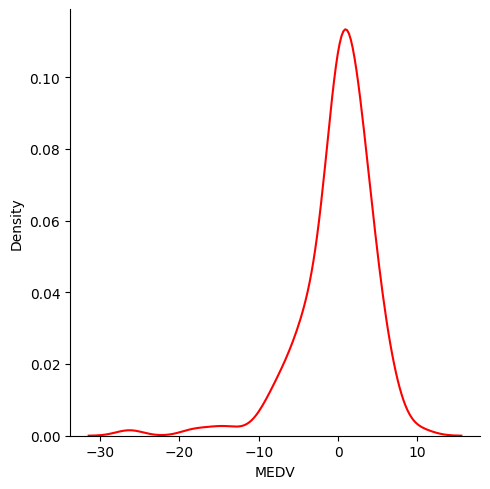

In [65]:
import seaborn as sns
sns.displot(reg_predict - y_test, kind="kde",color="red")

In [66]:
from sklearn.metrics import r2_score

In [67]:
score = r2_score(y_test, reg_predict)

In [68]:
score

0.7071862632031753